In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [67]:
df = pd.read_csv("/content/sample_data/sample_test.csv")
df

,Date,Description,Deposits,Withdrawls,Balance
0,20-Aug-2020,Interest,00.00,"4,893.98","39,151.80"
1,20-Aug-2020,Debit Card,00.00,"5,593.11","33,558.69"
2,20-Aug-2020,Reversal,00.00,"8,389.67","25,169.02"
3,20-Aug-2020,Reversal,343.29,00.00,"25,512.31"
4,21-Aug-2020,RTGS,00.00,"4,252.05","21,260.26"
...,...,...,...,...,...
3339,07-Jan-2021,Miscellaneous,"1,778,973.00",00.00,"2,042,879.72"
3340,07-Jan-2021,Bill,00.00,"1,021,439.86","1,021,439.86"
3341,07-Jan-2021,Interest,"17,212.20",00.00,"1,038,652.06"
3342,07-Jan-2021,RTGS,00.00,"103,865.21","934,786.85"


In [68]:
df['Date'] = pd.to_datetime(df['Date'])

In [69]:
df['Withdrawls'] = pd.to_numeric(df['Withdrawls'].str.replace(',', ''), errors='coerce')  # Converts Withdrawls to numeric, handles errors
df['Deposits'] = pd.to_numeric(df['Deposits'].str.replace(',', ''), errors='coerce')     # Converts Deposits to numeric, handles errors
df['Balance'] = pd.to_numeric(df['Balance'].str.replace(',', ''), errors='coerce')
df

,Date,Description,Deposits,Withdrawls,Balance
0,2020-08-20,Interest,0.00,4893.98,39151.80
1,2020-08-20,Debit Card,0.00,5593.11,33558.69
2,2020-08-20,Reversal,0.00,8389.67,25169.02
3,2020-08-20,Reversal,343.29,0.00,25512.31
4,2020-08-21,RTGS,0.00,4252.05,21260.26
...,...,...,...,...,...
3339,2021-01-07,Miscellaneous,1778973.00,0.00,2042879.72
3340,2021-01-07,Bill,0.00,1021439.86,1021439.86
3341,2021-01-07,Interest,17212.20,0.00,1038652.06
3342,2021-01-07,RTGS,0.00,103865.21,934786.85


In [70]:
df['Withdrawls'] = df['Withdrawls'].fillna(0).astype(int)  # Filling NaN with 0 and converting to int
df['Deposits'] = df['Deposits'].fillna(0).astype(int)      # Filling NaN with 0 and converting to int
df['Balance'] = df['Balance'].fillna(0).astype(int)

In [71]:
df['Transaction_Type'] = df.apply(lambda x: 'Deposit' if x['Deposits'] > 0 else 'Withdrawal', axis=1)
df['Transaction_Amount'] = df['Deposits'] - df['Withdrawls']
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [72]:
# Monthly trends
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_summary = df.groupby('YearMonth').agg({
    'Deposits': 'sum',
    'Withdrawls': 'sum',
    'Balance': 'mean'
})

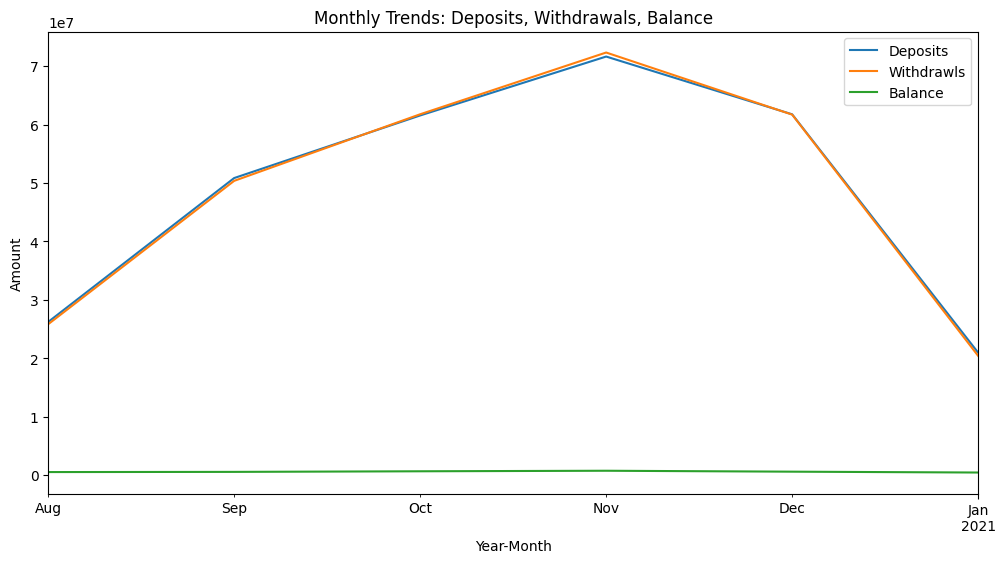

In [73]:
# Plot trends
import matplotlib.pyplot as plt

monthly_summary.plot(kind='line', figsize=(12, 6), title="Monthly Trends: Deposits, Withdrawals, Balance")
plt.xlabel("Year-Month")
plt.ylabel("Amount")
plt.show()

In [74]:
#Spending categories
#Examine transaction patterns by grouping descriptions.
top_descriptions = df['Description'].value_counts().head(10)
print("Top 10 Transaction Descriptions:")
print(top_descriptions)

Top 10 Transaction Descriptions:
Description
ATM           246
Reversal      244
Tax           228
RTGS          226
Interest      225
Bill          224
Cash          223
Purchase      223
Transfer      222
Debit Card    217
Name: count, dtype: int64


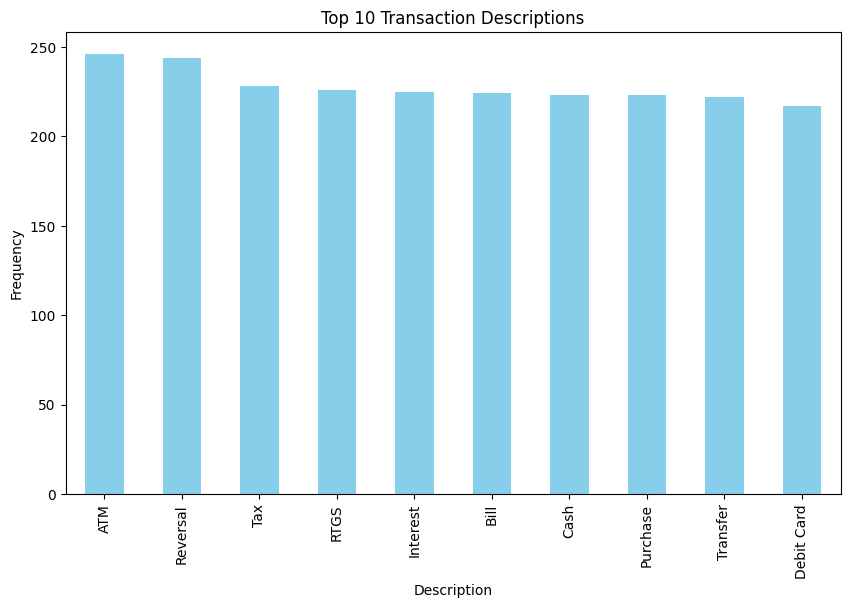

In [75]:
# Visualize
top_descriptions.plot(kind='bar', color='skyblue', figsize=(10, 6), title="Top 10 Transaction Descriptions")
plt.xlabel("Description")
plt.ylabel("Frequency")
plt.show()

In [76]:
#Withdrawl by weeks
df['DayOfWeek'] = df['Date'].dt.day_name()
weekly_spending = df.groupby('DayOfWeek')['Withdrawls'].sum()

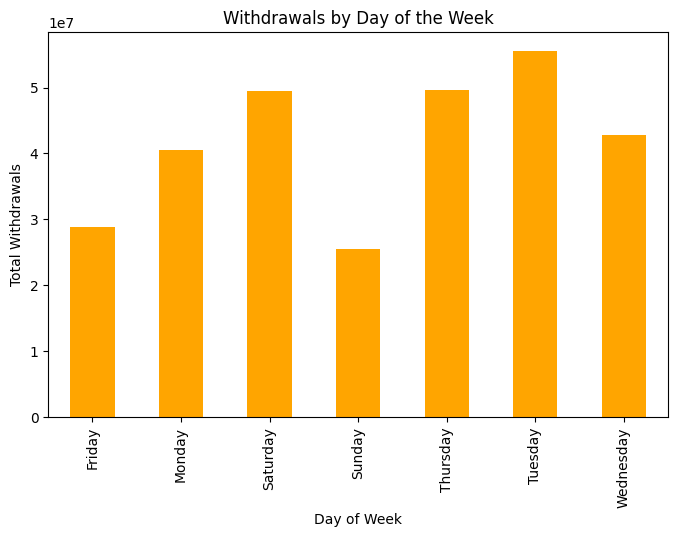

In [77]:
# Visualize
weekly_spending.plot(kind='bar', color='orange', figsize=(8, 5), title="Withdrawals by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Withdrawals")
plt.show()

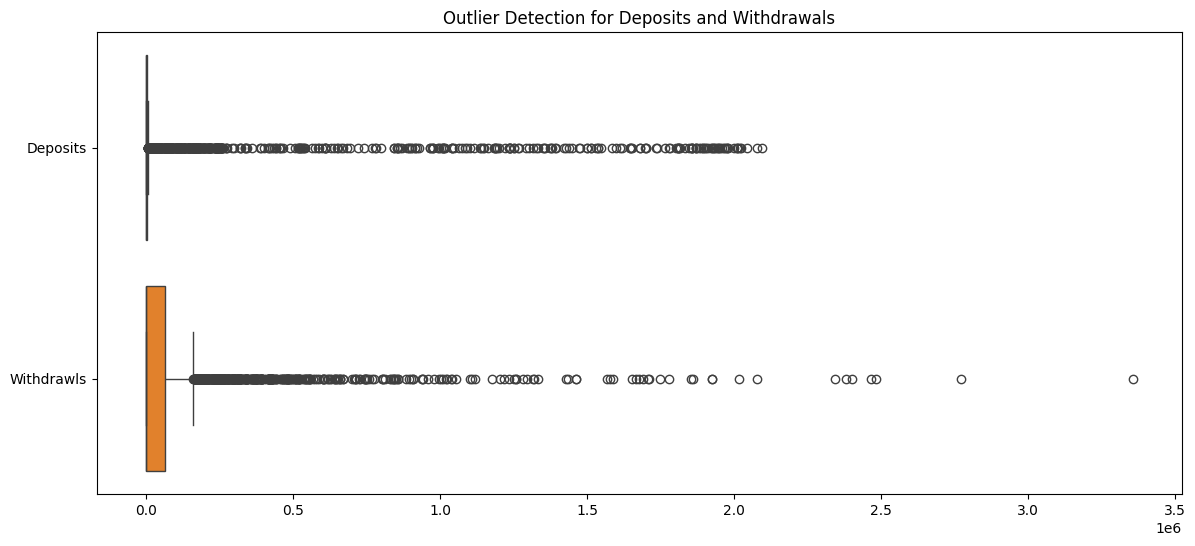

In [78]:
## Outlier Detection
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['Deposits', 'Withdrawls']], orient='h')
plt.title("Outlier Detection for Deposits and Withdrawals")
plt.show()

In [79]:
df.rename(columns={'Withdrawls': 'Withdrawals'}, inplace=True)
#Transaction Amount
df['Transaction_Amount'] = df['Deposits'] - df['Withdrawals']
df

,Date,Description,Deposits,Withdrawals,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth
0,2020-08-20,Interest,0,4893,39151,Withdrawal,-4893,8,Thursday,2020-08
1,2020-08-20,Debit Card,0,5593,33558,Withdrawal,-5593,8,Thursday,2020-08
2,2020-08-20,Reversal,0,8389,25169,Withdrawal,-8389,8,Thursday,2020-08
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08
4,2020-08-21,RTGS,0,4252,21260,Withdrawal,-4252,8,Friday,2020-08
...,...,...,...,...,...,...,...,...,...,...
3339,2021-01-07,Miscellaneous,1778973,0,2042879,Deposit,1778973,1,Thursday,2021-01
3340,2021-01-07,Bill,0,1021439,1021439,Withdrawal,-1021439,1,Thursday,2021-01
3341,2021-01-07,Interest,17212,0,1038652,Deposit,17212,1,Thursday,2021-01
3342,2021-01-07,RTGS,0,103865,934786,Withdrawal,-103865,1,Thursday,2021-01


In [80]:
#Transaction Type
df['Transaction_Amount'] = df['Deposits'] - df['Withdrawals']

In [81]:
#Transaction Type
df['Transaction_Type'] = df.apply(lambda x: 'Deposit' if x['Deposits'] > 0 else 'Withdrawal', axis=1)

In [82]:
#Transaction Category
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Description'].fillna(''))

# Display top keywords
tfidf_feature_names = tfidf.get_feature_names_out()
print("Top TF-IDF Features:", tfidf_feature_names[:10])

Top TF-IDF Features: ['atm' 'card' 'cash' 'cheque' 'commission' 'debit' 'imps' 'miscellaneous'
 'neft' 'purchase']


In [83]:
#Categorizing Transaction
import pickle
with open('/content/sample_data/random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [84]:
df

,Date,Description,Deposits,Withdrawals,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth
0,2020-08-20,Interest,0,4893,39151,Withdrawal,-4893,8,Thursday,2020-08
1,2020-08-20,Debit Card,0,5593,33558,Withdrawal,-5593,8,Thursday,2020-08
2,2020-08-20,Reversal,0,8389,25169,Withdrawal,-8389,8,Thursday,2020-08
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08
4,2020-08-21,RTGS,0,4252,21260,Withdrawal,-4252,8,Friday,2020-08
...,...,...,...,...,...,...,...,...,...,...
3339,2021-01-07,Miscellaneous,1778973,0,2042879,Deposit,1778973,1,Thursday,2021-01
3340,2021-01-07,Bill,0,1021439,1021439,Withdrawal,-1021439,1,Thursday,2021-01
3341,2021-01-07,Interest,17212,0,1038652,Deposit,17212,1,Thursday,2021-01
3342,2021-01-07,RTGS,0,103865,934786,Withdrawal,-103865,1,Thursday,2021-01


In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['DayOfWeek_Encoded'] = label_encoder.fit_transform(df['DayOfWeek'])
print(df.head())

        Date Description  Deposits  Withdrawals  Balance Transaction_Type  \
0 2020-08-20    Interest         0         4893    39151       Withdrawal   
1 2020-08-20  Debit Card         0         5593    33558       Withdrawal   
2 2020-08-20    Reversal         0         8389    25169       Withdrawal   
3 2020-08-20    Reversal       343            0    25512          Deposit   
4 2020-08-21        RTGS         0         4252    21260       Withdrawal   

   Transaction_Amount  Month DayOfWeek YearMonth  DayOfWeek_Encoded  
0               -4893      8  Thursday   2020-08                  4  
1               -5593      8  Thursday   2020-08                  4  
2               -8389      8  Thursday   2020-08                  4  
3                 343      8  Thursday   2020-08                  4  
4               -4252      8    Friday   2020-08                  0  


In [88]:
df.rename(columns={'Withdrawals': 'Withdrawls'}, inplace=True)

In [89]:
df_test = df[['Deposits', 'Withdrawls', 'Balance', 'Month', 'DayOfWeek_Encoded']]
df["Spending_Category"] = model.predict(df_test)

In [92]:
df.rename(columns={'Withdrawls': 'Withdrawals'}, inplace=True)

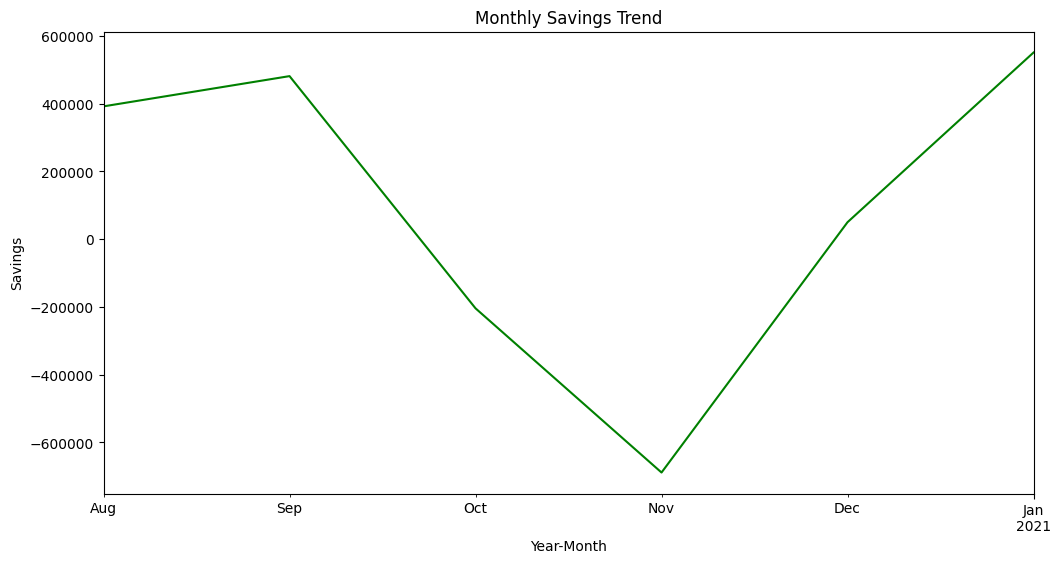

In [94]:
# Saving Analysis
df['Savings'] = df['Deposits'] - df['Withdrawals']
monthly_savings = df.groupby('YearMonth')['Savings'].sum()

# Visualize
monthly_savings.plot(kind='line', figsize=(12, 6), title="Monthly Savings Trend", color='green')
plt.xlabel("Year-Month")
plt.ylabel("Savings")
plt.show()


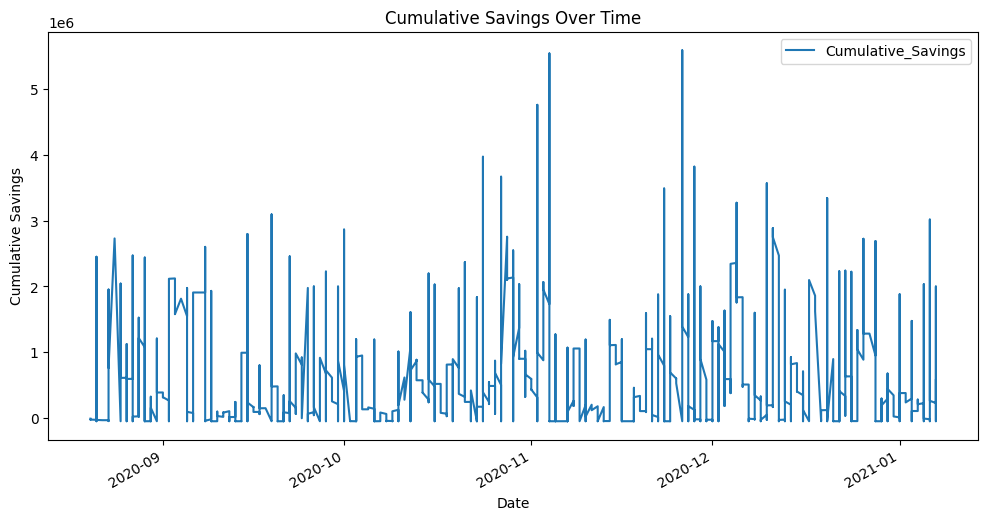

In [95]:
df['Cumulative_Deposits'] = df['Deposits'].cumsum()
df['Cumulative_Withdrawals'] = df['Withdrawals'].cumsum()
df['Cumulative_Savings'] = df['Savings'].cumsum()

# Visualize cumulative savings
df.plot(x='Date', y='Cumulative_Savings', figsize=(12, 6), title="Cumulative Savings Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Savings")
plt.show()


In [96]:
df['Spending_to_Income_Ratio'] = df['Withdrawals'] / (df['Deposits'] + 1e-9)  # Avoid division by zero
df['Spending_to_Income_Ratio'] = df['Spending_to_Income_Ratio'].apply(lambda x: min(x, 1))  # Cap at 1


In [97]:
df['Savings_Trend'] = df['Savings'] / df['Balance']
df['Transaction_Volatility'] = abs(df['Deposits'] - df['Withdrawals'])

In [98]:
df['Rolling_3_Month_Savings'] = df['Savings'].rolling(window=3).mean()
df['Rolling_3_Month_Balance'] = df['Balance'].rolling(window=3).mean()


In [101]:
# 1. Income Stability
# Monthly Average Income
# Helps in assessing income consistency over time.
df['Monthly_Income'] = df.groupby(df['Date'].dt.to_period('M'))['Deposits'].transform('mean')
df

,Date,Description,Deposits,Withdrawals,Balance,Transaction_Type,Transaction_Amount,Month,DayOfWeek,YearMonth,...,Savings,Cumulative_Deposits,Cumulative_Withdrawals,Cumulative_Savings,Spending_to_Income_Ratio,Savings_Trend,Transaction_Volatility,Rolling_3_Month_Savings,Rolling_3_Month_Balance,Monthly_Income
0,2020-08-20,Interest,0,4893,39151,Withdrawal,-4893,8,Thursday,2020-08,...,-4893,0,4893,-4893,1.0,-0.124978,4893,NaN,NaN,95309.985455
1,2020-08-20,Debit Card,0,5593,33558,Withdrawal,-5593,8,Thursday,2020-08,...,-5593,0,10486,-10486,1.0,-0.166667,5593,NaN,NaN,95309.985455
2,2020-08-20,Reversal,0,8389,25169,Withdrawal,-8389,8,Thursday,2020-08,...,-8389,0,18875,-18875,1.0,-0.333307,8389,-6291.666667,3.262600e+04,95309.985455
3,2020-08-20,Reversal,343,0,25512,Deposit,343,8,Thursday,2020-08,...,343,343,18875,-18532,0.0,0.013445,343,-4546.333333,2.807967e+04,95309.985455
4,2020-08-21,RTGS,0,4252,21260,Withdrawal,-4252,8,Friday,2020-08,...,-4252,343,23127,-22784,1.0,-0.200000,4252,-4099.333333,2.398033e+04,95309.985455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,2021-01-07,Miscellaneous,1778973,0,2042879,Deposit,1778973,1,Thursday,2021-01,...,1778973,292942900,290943781,1999119,0.0,0.870817,1778973,583315.666667,8.568080e+05,104267.447761
3340,2021-01-07,Bill,0,1021439,1021439,Withdrawal,-1021439,1,Thursday,2021-01,...,-1021439,292942900,291965220,977680,1.0,-1.000000,1021439,252600.333333,1.109408e+06,104267.447761
3341,2021-01-07,Interest,17212,0,1038652,Deposit,17212,1,Thursday,2021-01,...,17212,292960112,291965220,994892,0.0,0.016571,17212,258248.666667,1.367657e+06,104267.447761
3342,2021-01-07,RTGS,0,103865,934786,Withdrawal,-103865,1,Thursday,2021-01,...,-103865,292960112,292069085,891027,1.0,-0.111111,103865,-369364.000000,9.982923e+05,104267.447761


In [102]:
# Income Variance
# Measures the fluctuation in income.
df['Income_Variance'] = df.groupby(df['Date'].dt.to_period('M'))['Deposits'].transform('std').fillna(0)

In [104]:
#Average Daily Spending
#Helps in understanding spending habits.
df['Daily_Spending_Avg'] = df['Withdrawals'] / (df['Date'].dt.days_in_month)


In [110]:
# Weekday Spending Ratio
# Compares weekday and weekend spending.
df['Weekday_Spending_Ratio'] = df.groupby(df['DayOfWeek'])['Withdrawals'].transform('mean') / df['Withdrawals'].mean()


In [111]:
# 6. Spending Categories (NLP-Enhanced)
# Dominant Category per Month
# Identifies the category with the highest spending per month.
df['Dominant_Category'] = df.groupby(df['Date'].dt.to_period('M'))['Spending_Category'].transform(lambda x: x.mode()[0])


In [114]:
# Categorical Spending Intensity
# Shows the intensity of spending in a category compared to the average.
df['Category_Intensity'] = df['Withdrawals'] / df.groupby('Spending_Category')['Withdrawals'].transform('mean')


In [115]:
# Large Transaction Flag
# Highlights transactions larger than a dynamic threshold.
dynamic_threshold = df['Transaction_Amount'].quantile(0.95)  # Top 5% threshold
df['Large_Transaction_Flag'] = df['Transaction_Amount'] > dynamic_threshold


NameError: name 'output_dir' is not defined

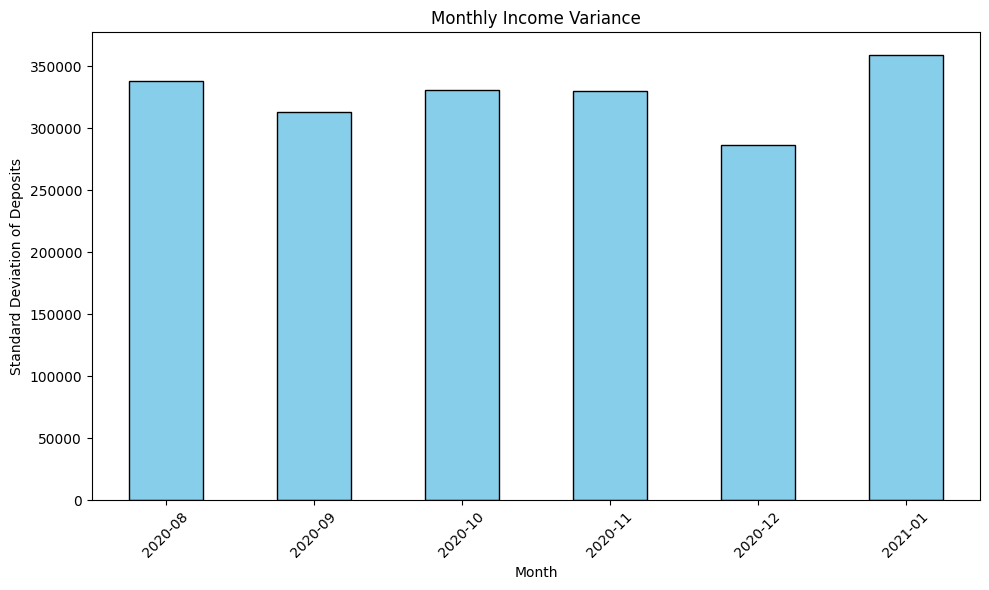

In [117]:
import os
# Visualize Income Variance
plt.figure(figsize=(10, 6))
df['Month'] = df['Date'].dt.to_period('M')
income_variance = df.groupby('Month')['Income_Variance'].mean()

income_variance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Monthly Income Variance")
plt.xlabel("Month")
plt.ylabel("Standard Deviation of Deposits")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
file_path = os.path.join(output_dir, "income_variance.png")
plt.savefig(file_path)
plt.close()

NameError: name 'output_dir' is not defined

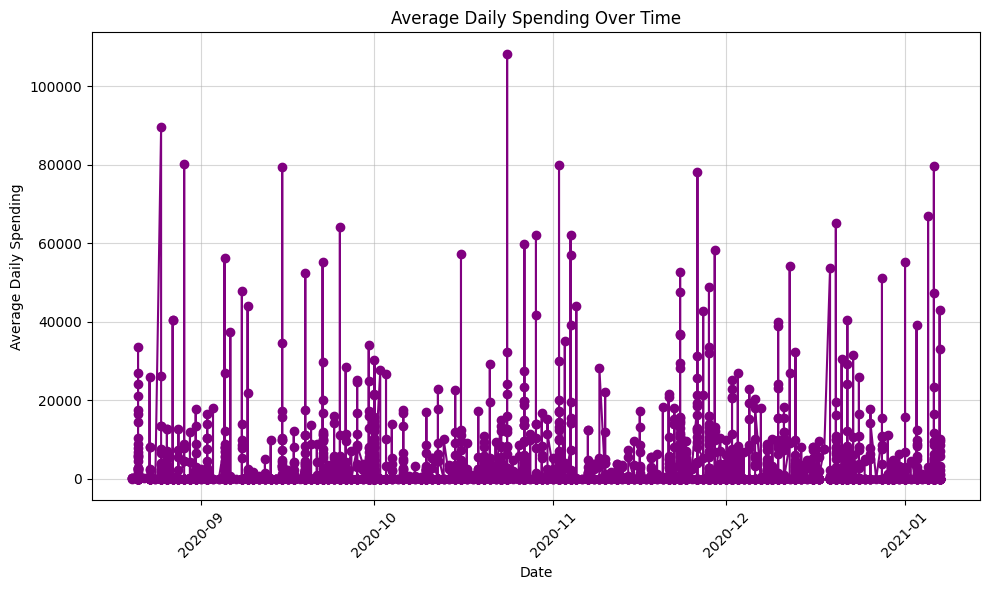

In [121]:
# Visualize Average Daily Spending
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily_Spending_Avg'], marker='o', color='purple')
plt.title("Average Daily Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Average Daily Spending")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

# Save the plot
file_path = os.path.join(output_dir, "average_daily_spending.png")
plt.savefig(file_path)
plt.close()

<ipython-input-127-5ef40c0741f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="Weekday_Spending_Ratio", data=df, palette="viridis")


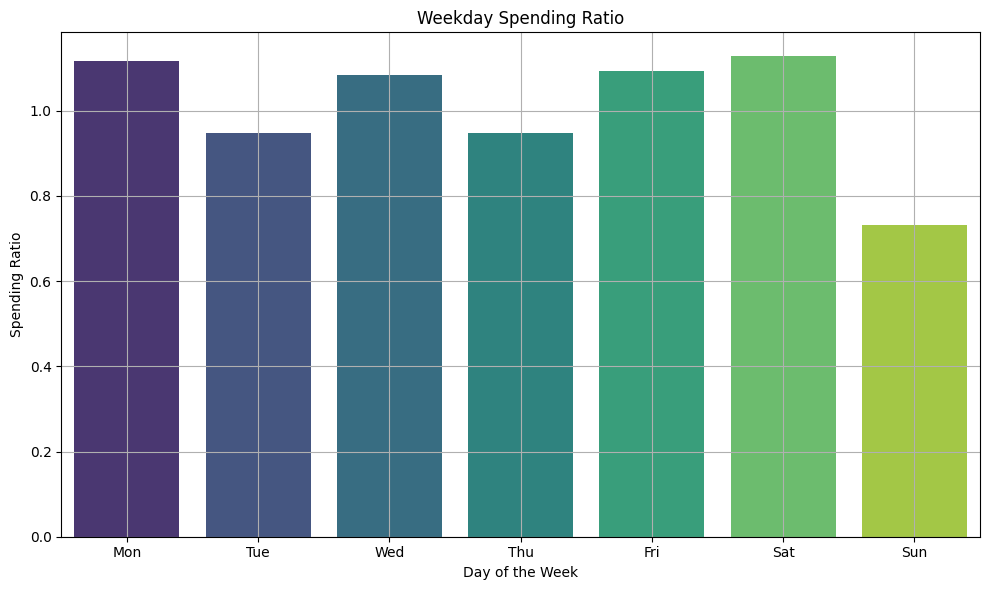

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/save/weekday_spending_ratio.png'

<Figure size 640x480 with 0 Axes>

In [127]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting the Weekday Spending Ratio
sns.barplot(x="DayOfWeek", y="Weekday_Spending_Ratio", data=df, palette="viridis")

# Add title and labels
plt.title('Weekday Spending Ratio')
plt.xlabel('Day of the Week')
plt.ylabel('Spending Ratio')

# Format the x-axis labels (days of the week)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add grid for clarity
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()


# Display the plot
plt.show()

# Save the plot as an image file
plt.savefig('/path/to/save/weekday_spending_ratio.png')  # Adjust path as needed

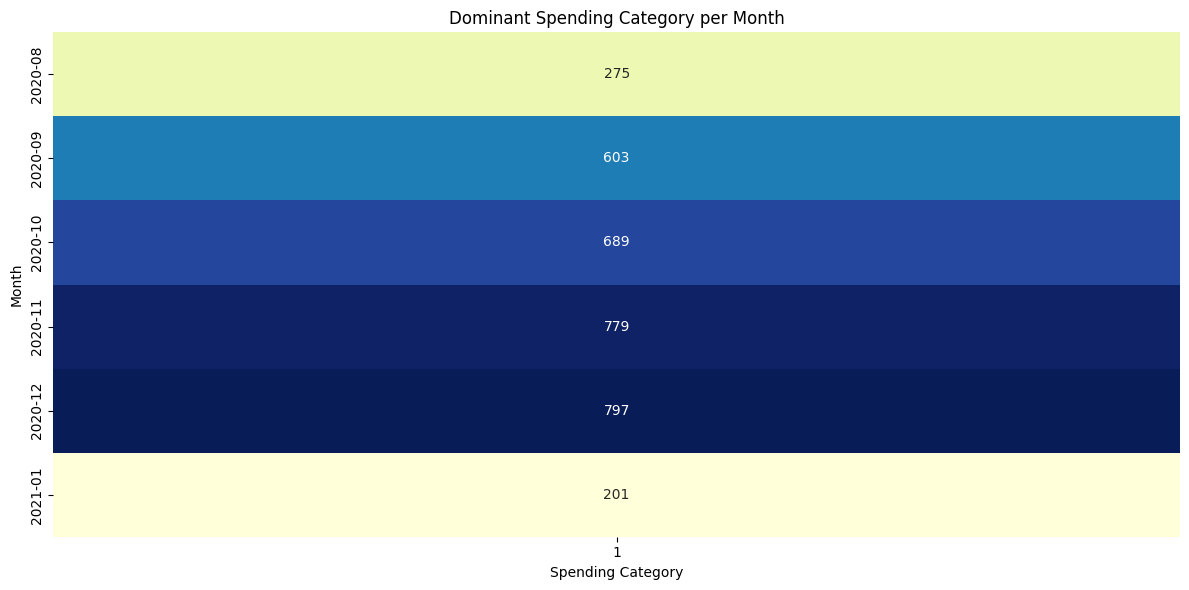

In [129]:
# Extract dominant category for each month
dominant_category_per_month = df.groupby(df['Date'].dt.to_period('M'))['Dominant_Category'].value_counts().unstack().fillna(0)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting the Dominant Spending Category per Month using a heatmap for better clarity
sns.heatmap(dominant_category_per_month, annot=True, fmt="g", cmap="YlGnBu", cbar=False)

# Add title and labels
plt.title('Dominant Spending Category per Month')
plt.xlabel('Spending Category')
plt.ylabel('Month')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-130-387e6d07ada0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Spending_Category', y='Category_Intensity', data=df, palette='Set2')


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/save/category_spending_intensity.png'

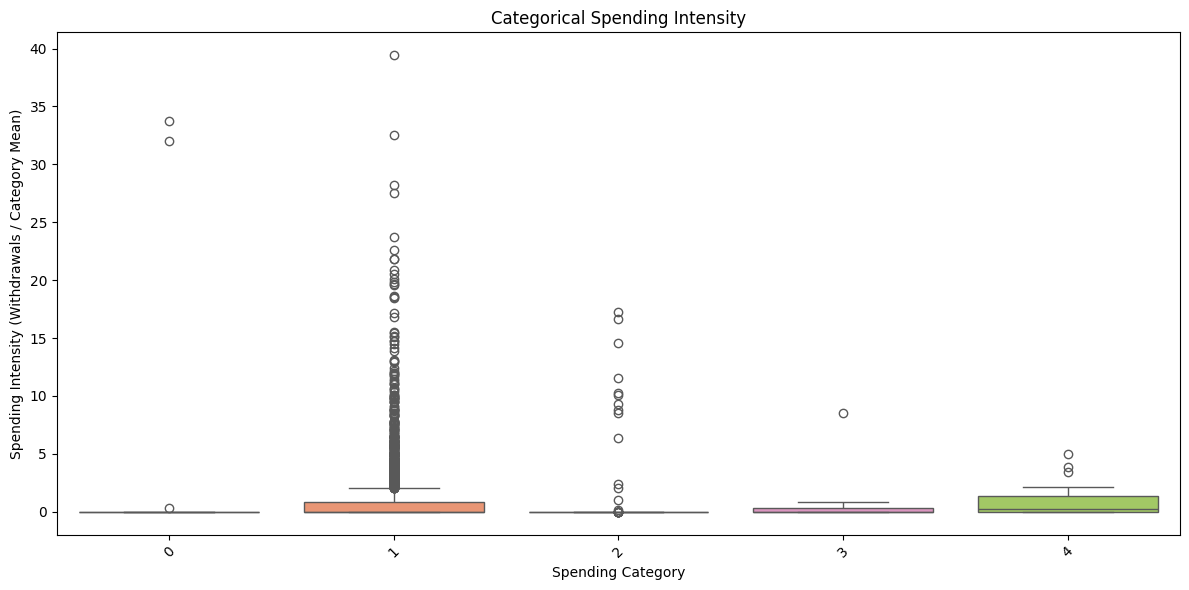

In [130]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting Categorical Spending Intensity using a boxplot
sns.boxplot(x='Spending_Category', y='Category_Intensity', data=df, palette='Set2')

# Add title and labels
plt.title('Categorical Spending Intensity')
plt.xlabel('Spending Category')
plt.ylabel('Spending Intensity (Withdrawals / Category Mean)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file
plt.savefig('/path/to/save/category_spending_intensity.png')  # Adjust path as needed

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/save/large_transactions_flag.png'

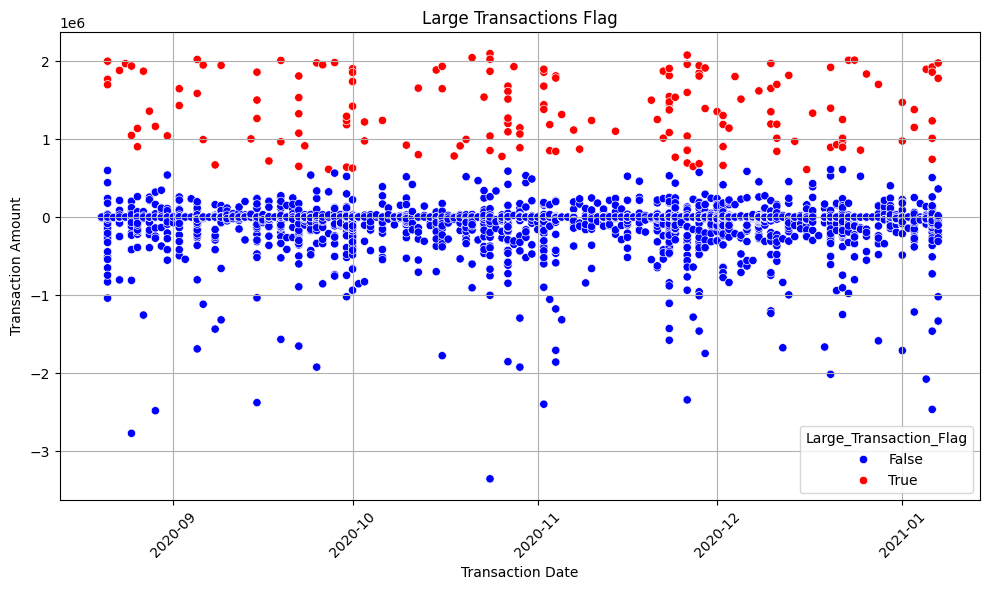

In [131]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting large transactions using a scatter plot
sns.scatterplot(x='Date', y='Transaction_Amount', hue='Large_Transaction_Flag', data=df, palette={True: 'red', False: 'blue'}, marker='o')

# Add title and labels
plt.title('Large Transactions Flag')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as an image file
plt.savefig('/path/to/save/large_transactions_flag.png')  # Adjust path as needed

# Display the plot
plt.show()